# U-TAD - PEDS 2015
# 9 - Teoría de Grafos y Redes Sociales
## Autor: Rafael Enríquez Herrador (rafael.enriquez@live.u-tad.com)

# Ejercicio 2

El ejercicio de esta práctica consistirá en desarrollar un algoritmo de recomendación de amistad para los individuos de una red social, cuyas relaciones vienen descritas en el fichero _datasets/facebook-links-sample2000.dat_. Las consideraciones para el desarrollo del algoritmo serán las siguientes:
* El número máximo de recomendaciones por nodo será 10.
* Estudiado un nodo __X__, otro nodo __Y__ será considerado como posible amigo si __Y__ no es amigo __X__ pero es amigo de otro nodo __Z__ que si es amigo de __X__.
* Un nodo __Y__ será considerado como mejor opción de amistad que el nodo __Z__ para el nodo __X__ estudiado, si se cumple la regla anterior para __Y__ y __Z__ e __Y__ comparte más amigos con __X__ que __Z__.

## Carga y descripción del grafo
En primer lugar vamos a cargar el grafo y estudiaremos sus características principales.

In [2]:
import networkx as nx
import community
import pylab as plt
import math
import operator
import pandas as pd
from numpy import *
# show plots in the notebook
%matplotlib inline

In [3]:
g = nx.read_edgelist('datasets/facebook-links-sample2000.dat',
         delimiter=None, create_using=None, 
         nodetype=int, data=True, edgetype=None, 
         encoding='utf-8')

Número de nodos:

In [4]:
print g.number_of_nodes()

1530


Número de aristas:

In [5]:
print g.number_of_edges()

1951


Representamos el grafo para hacernos una idea de su distribución:

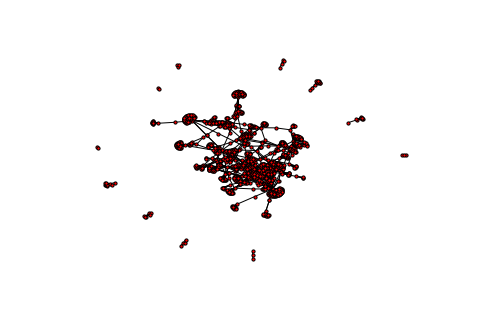

In [7]:
nx.draw(g, node_size=10)

## Medidas de centralidad
El siguiente paso será añadir a cada nodo sus medidas de centralidad:
* Centralidad de Grado (_Degree Centrality_)
* Intermediación (_Betweenness Centrality_)
* Cercanía (_Closeness Centrality_)
* Centralidad de Vector Propio (_Eigenvector Centrality_)

### Centralidad de Grado (_Degree Centrality_)
Mide el número de enlaces que tiene un nodo con los demás. Este valor se normaliza dividiendo por el número posible de enlaces que podría tener que se corresponde con el número de nodos que posee el grafo menos 1 ($n-1$) siendo $n$ el número total de nodos del grafo $g$ estudiado.

In [8]:
dg = nx.degree_centrality(g)
nx.set_node_attributes(g, 'degree', dg)
sorted(nx.get_node_attributes(g, 'degree').items(), key=lambda x: x[1],reverse = True)[:10]

[(510, 0.10333551340745586),
 (89, 0.06998037933289733),
 (858, 0.06344015696533682),
 (571, 0.05428384565075213),
 (86, 0.04839764551994768),
 (1284, 0.04447351209941138),
 (90, 0.040549378678875085),
 (509, 0.039241334205362986),
 (373, 0.03466317854807063),
 (303, 0.034009156311314584)]

Representemos el grafo con tamaños y colores de nodo proporcionales a la centralidad de grado.

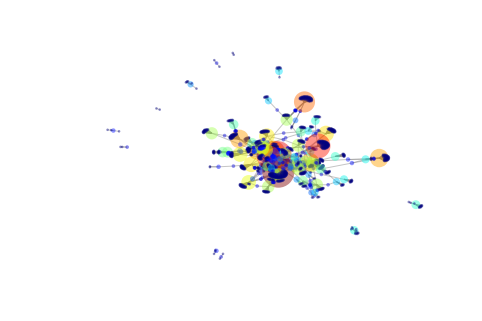

In [9]:
node_list = nx.get_node_attributes(g, 'degree').keys()
node_size = [10000*v for v in nx.get_node_attributes(g, 'degree').values()]
#node_col = [log(v)+1 for v in res_degree.values()]
node_col = [log(v*1000+1) for v in nx.get_node_attributes(g, 'degree').values()]
# pos = nx.shell_layout(g)
nx.draw(g, node_list=node_list, node_size=node_size, 
        node_color=node_col, linewidths=0, alpha=.45,
         edge_color="gray")

### Intermediación (_Betweenness Centrality_)
Mide número de veces que un nodo actúa como un puente a lo largo del camino más corto entre otros dos nodos. Al tratarse de un grafo no dirigido, el valor de la intermediación se normaliza por $2/((n-1)(n-2))$.

In [8]:
bb = nx.betweenness_centrality(g)
nx.set_node_attributes(g, 'betweenness', bb)
sorted(nx.get_node_attributes(g, 'betweenness').items(), key=lambda x: x[1],reverse = True)[:10]

[(510, 0.24166123587194416),
 (232, 0.1858671009991094),
 (571, 0.13567332266233187),
 (639, 0.1325212348544902),
 (858, 0.127082784067095),
 (711, 0.1163876218397681),
 (86, 0.09974452852328428),
 (275, 0.09721519841910514),
 (161, 0.09717447001830144),
 (446, 0.09582763040203955)]

Representamos el grafo con tamaños y colores de nodo proporcionales a la intermediación.

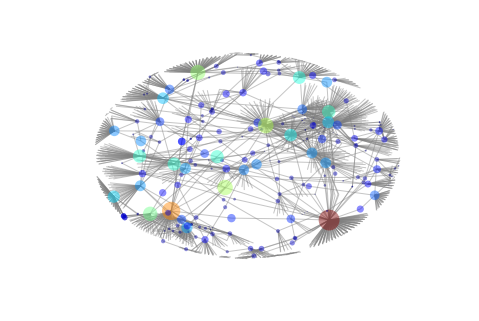

In [9]:
node_list = nx.get_node_attributes(g, 'betweenness').keys()
node_size = [1800 * v for v in nx.get_node_attributes(g, 'betweenness').values()]
node_col = [v + 6 for v in nx.get_node_attributes(g, 'betweenness').values()]
# pos = nx.shell_layout(g)
nx.draw(g, node_list=node_list, node_size=node_size, 
        node_color=node_col, linewidths=0,alpha=.45, 
        edge_color="gray")

### Cercanía (_Closeness Centrality_)
Mide la suma o promedio de las distancias más cortas desde un nodo a todos los demás del grafo. El valor se normaliza por el número de nodos en la parte conectada del grafo al que pertenece el nodo.

In [10]:
cc = nx.closeness_centrality(g)
nx.set_node_attributes(g, 'closeness', cc)
sorted(nx.get_node_attributes(g, 'closeness').items(), key=lambda x: x[1],reverse = True)[:10]

[(90, 0.24917493604993524),
 (510, 0.2447920261681792),
 (571, 0.24423906416293392),
 (639, 0.24155281221132235),
 (89, 0.23493160860064932),
 (88, 0.23375949014762762),
 (509, 0.23329391108011366),
 (111, 0.23206138587711486),
 (9, 0.23069026986011568),
 (86, 0.22978515845311176)]

Representamos el grafo con tamaños y colores de nodo proporcionales a la cercanía.

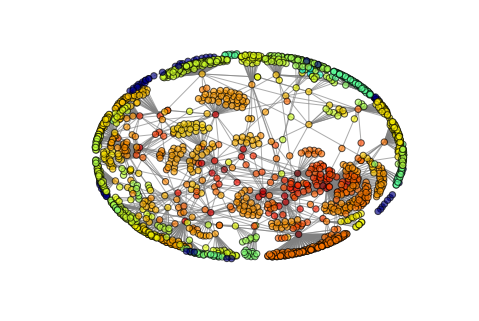

In [11]:
node_list = nx.get_node_attributes(g, 'closeness').keys()
node_size = [sqrt(v) + 40 for v in nx.get_node_attributes(g, 'closeness').values()]
node_col = [v + 1000 for v in nx.get_node_attributes(g, 'closeness').values()]
nx.draw(g, node_list=node_list, node_size=node_size, 
        node_color=node_col, alpha=.65, 
        edge_color="gray")

### Centralidad de Vector Propio (__Eigenvector Centrality__)
Mide la interconexión de un nodo con otros nodos que estén bien conectados dentro de la red. Es similar al algoritmo del _PageRank_ de _Google_.

In [12]:
ev = nx.eigenvector_centrality(g)
nx.set_node_attributes(g, 'eigenvector', ev)
sorted(nx.get_node_attributes(g, 'eigenvector').items(), key=lambda x: x[1],reverse = True)[:10]

[(89, 0.4492630963212762),
 (86, 0.30596720371857616),
 (90, 0.2881283933023257),
 (571, 0.2823657598870716),
 (87, 0.20859600516370122),
 (509, 0.18201915984824651),
 (88, 0.12724739264281967),
 (111, 0.12714641991252545),
 (96, 0.10617795820375699),
 (103, 0.09931459860654845)]

Representamos el grafo con tamaño y colores de nodo proporcionales a la centralidad de vector propio.

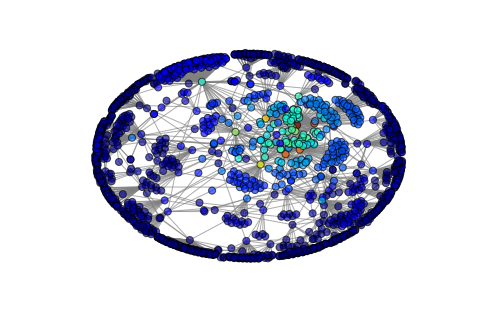

In [13]:
node_list = nx.get_node_attributes(g, 'eigenvector').keys()
node_size = [sqrt(v) + 50 for v in nx.get_node_attributes(g, 'eigenvector').values()]
node_col = [sqrt(v) + 100 for v in nx.get_node_attributes(g, 'eigenvector').values()]
nx.draw(g, node_list=node_list, node_size=node_size, 
        node_color=node_col, alpha=.65, 
        edge_color="gray")

## Estudio de la centralidad
A continuación mediremos las correlación entre las distintas de centralidad.

### Histograma de grado
Nos mostrará la distribución de nodos según el número de conexiones que tengan con otros nodos dentro del grafo.

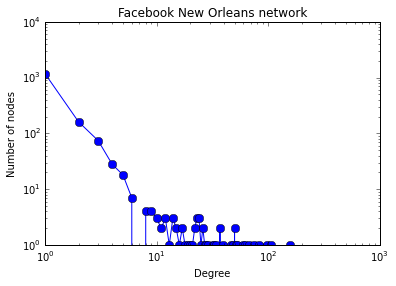

In [14]:
x = nx.get_node_attributes(g, 'degree').values()
y = nx.get_node_attributes(g, 'betweenness').values()

plt.plot(nx.degree_histogram(g), 'bo-', markersize=8)
plt.title('Facebook New Orleans network')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.xscale('log')
plt.yscale('log')
plt.show()

Como se puede apreciar, el grado de conexión de casi todos los nodos es bastante bajo, aunque algunos nodos poseen un gran número de enlaces a otros nodos, por lo que podríamos estar hablando de una __Red libre de escala__ (___Scale-free network___)

### Correlación Grado-Intermediación

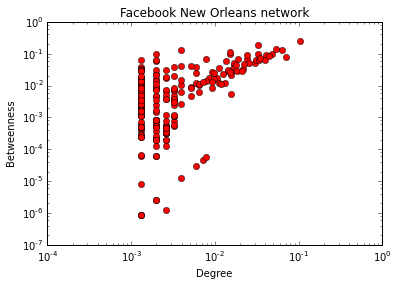

In [15]:
x = nx.get_node_attributes(g, 'degree').values()
y = nx.get_node_attributes(g, 'betweenness').values()

plt.plot(x, y, 'ro')
plt.title('Facebook New Orleans network')
plt.xlabel('Degree')
plt.ylabel('Betweenness')
plt.xscale('log')
plt.yscale('log')
plt.show()

Como se puede apreciar, para valores altos de grado (más de 10 conexiones), parece existir una relación directa entre el grado de un nodo y su intermediación.

### Correlación Grado-Cercanía

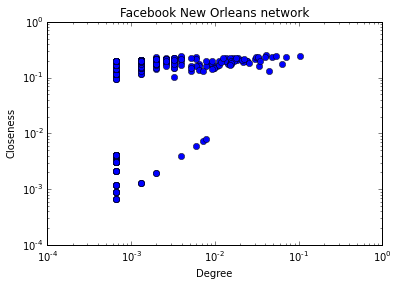

In [16]:
x = nx.get_node_attributes(g, 'degree').values()
y = nx.get_node_attributes(g, 'closeness').values()

plt.plot(x, y, 'bo')
plt.title('Facebook New Orleans network')
plt.xlabel('Degree')
plt.ylabel('Closeness')
plt.xscale('log')
plt.yscale('log')
plt.show()

Como se puede apreciar, no parece existir una relación entre el grado de un nodo y su cercanía a otros nodos.

### Correlación Grado-Centralidad de Vector Propio

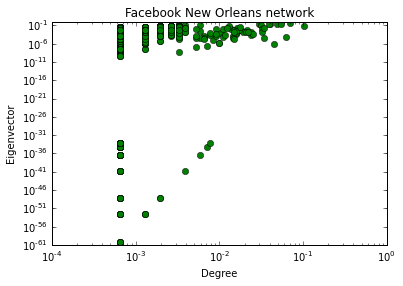

In [17]:
x = nx.get_node_attributes(g, 'degree').values()
y = nx.get_node_attributes(g, 'eigenvector').values()

plt.plot(x, y, 'go')
plt.title('Facebook New Orleans network')
plt.xlabel('Degree')
plt.ylabel('Eigenvector')
plt.xscale('log')
plt.yscale('log')
plt.show()

Como se puede apreciar, no parece existir una relación entre el grado de un nodo y la centralidad de vector propio.

### Correlación Intermediación-Cercanía

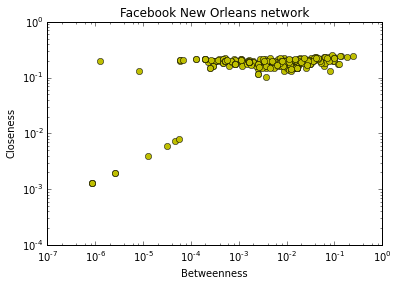

In [18]:
x = nx.get_node_attributes(g, 'betweenness').values()
y = nx.get_node_attributes(g, 'closeness').values()

plt.plot(x, y, 'yo')
plt.title('Facebook New Orleans network')
plt.xlabel('Betweenness')
plt.ylabel('Closeness')
plt.xscale('log')
plt.yscale('log')
plt.show()

Como se puede apreciar, la mayoría de los nodos parecen tener un valor de cercanía parecido, pero este no guarda relación con la medida de intermediación.

### Correlación Intermediación-Centralidad de Vector Propio

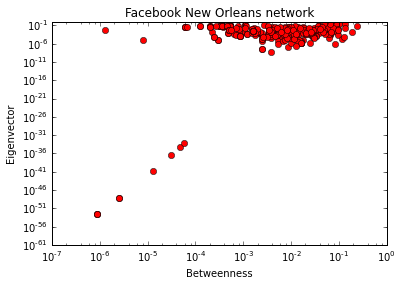

In [19]:
x = nx.get_node_attributes(g, 'betweenness').values()
y = nx.get_node_attributes(g, 'eigenvector').values()

plt.plot(x, y, 'ro')
plt.title('Facebook New Orleans network')
plt.xlabel('Betweenness')
plt.ylabel('Eigenvector')
plt.xscale('log')
plt.yscale('log')
plt.show()

Salvo algunas excepciones, la intermediación de un nodo no mantiene una relación con la centralidad de vector propio, por lo que podemos generalizar que estas medidas no guardan correlación.

### Correlación Cercanía-Centralidad de Vector Propio

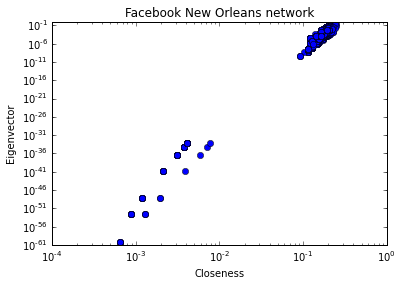

In [20]:
x = nx.get_node_attributes(g, 'closeness').values()
y = nx.get_node_attributes(g, 'eigenvector').values()

plt.plot(x, y, 'bo')
plt.title('Facebook New Orleans network')
plt.xlabel('Closeness')
plt.ylabel('Eigenvector')
plt.xscale('log')
plt.yscale('log')
plt.show()

En este caso, si parece apreciarse una relación directa entre la cercanía de un nodo y su número de conexiones con nodos bien conectados.

## Algoritmo de recomendación

### Función de recomendación
En el siguiente apartado, tal y como pide el ejercicio, realizaremos un algoritmo de recomendación de amistad, según los parámetros que se describen en el enunciado. La función de recomendación será codificada en una función aparte para su reutilización. Las características de esta función serán:
* Recibe como primer parámetro el grafo a estudiar
* Recibe como segundo parámetro la lista de nodos sobre la que se realizarán las recomendaciones
* Para cada nodo estudiado se devolverán como máximo (y siempre que sea posible) 10 recomendaciones, obtenidas de vecinos de segundo nivel y ordenadas según el número de nodos con los que tengan conexiones en común
* La función devolverá un dictionario cuya estructura, para cada elemento será:
{nodo_estudiado: [(nodo_recomendado, nodos_en_comun), (nodo_recomendado, nodos_comun),...], nodo_estudiado:...}

In [23]:
# La función friend_recommendations acepta como parámetros el grafo a estudiar y el listado de nodos
# sobre los que se van a realizar las recomendaciones.
def friend_recommendations(graph = g, nodes = [1]):
    
    # Diccionario final devuelto con las recomendaciones. La estructura será:
    # {nodo_estudiado: [(nodo_recomendado, num_nodos_comun), (nodo_recomendado, num_nodos_comun),...],
    # nodo_estudiado:[...]...}
    recommended = dict()
    
    # Para cada nodo a estudiar obtenemos su lista de recomendados
    for i in nodes:
        # Obtenemos la lista de los nodos cuyo camino más corto desde el nodo estudiado tiene
        # orden dos. Es decir, obtenemos los nodos que sean como máximo vecinos de nivel 2.
        temp = nx.single_source_shortest_path(g, i, cutoff=2)
        
        # Como la funcion anterior nos devuelve los nodos y sus vertices, filtraremos y solo
        # nos quedaremos con aquellos que tengan nivel dos, o lo que es equivalente, aquellos
        # que tengan 3 nodos en su camino.
        second_neighbors = []
        for j in temp.keys():
            if len(temp[j]) == 3:
                second_neighbors.append(j)
        
        # Una vez que tenemos todos los nodos vecinos de orden 2, calculamos el numero de nodos
        # que tienen en comun con el nodo estudiado para establecer un ranking.
        temp_recommended = dict()
        for j in second_neighbors:
            temp_recommended[j] = 0
            for k in g[j].keys():
                if k in graph[i].keys():
                    temp_recommended[j] = temp_recommended[j] + 1

        # Finalmente ordenamos de forma descendiente los nodos recomendados según el número de nodos
        # que tengan en comun con el nodo estudiado y nos quedamos con los 10 primeros.
        recommended[i] = sorted(temp_recommended.items(), key=lambda x: x[1],reverse = True)[:10]
    
    # Repetido el proceso para cada nodo estudiado, devolvemos el diccionario final con los nodos
    # estudiados y las recomendaciones.
    return recommended

## Mostramos recomendaciones para 30 nodos tomados aleatoriamente
friends = friend_recommendations(g, random.choice(g.nodes(), 30))

for i in friends:
    print ""
    print "=================="
    print "Nodo " + str(i) + " (" + str(len(friends[i])) + " recomendacion(es))"
    print "=================="
    
    for j in friends[i]:
        print "\t" + str(i) + " podría ser amigo de " + str(j[0]) + ":\t" + str(j[1]) + " amigo(s) en común"


Nodo 769 (10 recomendacion(es))
	769 podría ser amigo de 768:	1 amigo(s) en común
	769 podría ser amigo de 770:	1 amigo(s) en común
	769 podría ser amigo de 771:	1 amigo(s) en común
	769 podría ser amigo de 309:	1 amigo(s) en común
	769 podría ser amigo de 566:	1 amigo(s) en común
	769 podría ser amigo de 759:	1 amigo(s) en común
	769 podría ser amigo de 760:	1 amigo(s) en común
	769 podría ser amigo de 761:	1 amigo(s) en común
	769 podría ser amigo de 762:	1 amigo(s) en común
	769 podría ser amigo de 763:	1 amigo(s) en común

Nodo 777 (10 recomendacion(es))
	777 podría ser amigo de 128:	1 amigo(s) en común
	777 podría ser amigo de 515:	1 amigo(s) en común
	777 podría ser amigo de 772:	1 amigo(s) en común
	777 podría ser amigo de 773:	1 amigo(s) en común
	777 podría ser amigo de 774:	1 amigo(s) en común
	777 podría ser amigo de 775:	1 amigo(s) en común
	777 podría ser amigo de 776:	1 amigo(s) en común
	777 podría ser amigo de 521:	1 amigo(s) en común
	777 podría ser amigo de 778:	1 am

### Ejemplo de visualización
Para finalizar, vamos a visualizar un subgrafo, realizando la recomendación para un nodo, mostrando en _rojo_
al nodo estudiado y en _azul_ las recomendaciones de amistad.

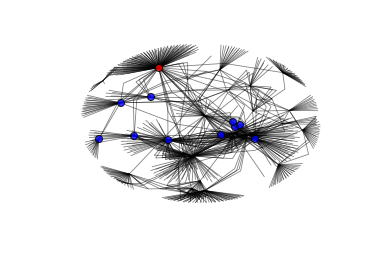

In [25]:
# Nodo a estudiar
target_node = 510

# Diccionario con las recomendaciones
rg = friend_recommendations(g, [target_node])
# Listado con los nodos recomendados
rg_list = []

for i in rg[target_node]:
    rg_list.append(i[0])

# Subgrafo que mostrara al nodo estudiado y todos los veciones de orden menor o igual a 3
sg = g.subgraph(nx.single_source_shortest_path(g, target_node, cutoff=3).keys())

# Layout para representación gráfica
pos=nx.spring_layout(sg)

# Nodo estudiado (coloreado en rojo)
nx.draw_networkx_nodes(sg,pos,
                       nodelist=[target_node],
                       node_color='r',
                       node_size=50,
                   alpha=0.8)

# Nodos recomendados (coloreados en azul)
nx.draw_networkx_nodes(sg,pos,
                       nodelist=rg_list,
                       node_color='b',
                       node_size=50,
                   alpha=0.8)

# Aristas del grafo
nx.draw_networkx_edges(sg,pos,width=0.8,alpha=0.5)

# Visualización
plt.axis('off')
plt.show()